In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

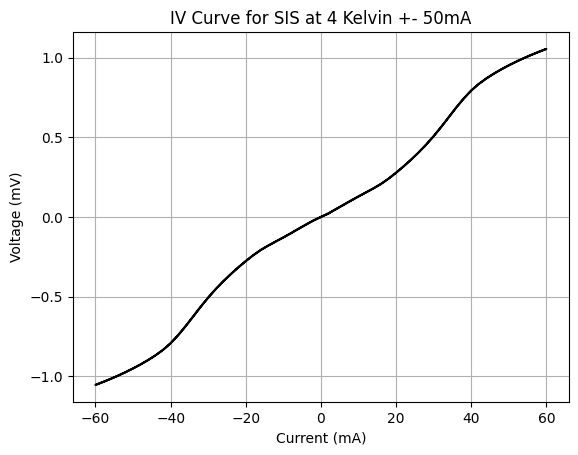

In [137]:
test_name = 'SIS at 4 Kelvin +- 50mA'
df = pd.read_csv('20250415 SIS/4K SIS 50mA.txt', sep='\t')
plt.plot(df['Current (mA)'], df['Voltage (mV)'], color='black')

plt.xlabel('Current (mA)')
plt.ylabel('Voltage (mV)')
plt.title(f'IV Curve for {test_name}')
#plt.legend()
plt.grid()
plt.savefig(f'{test_name}-IV.png')

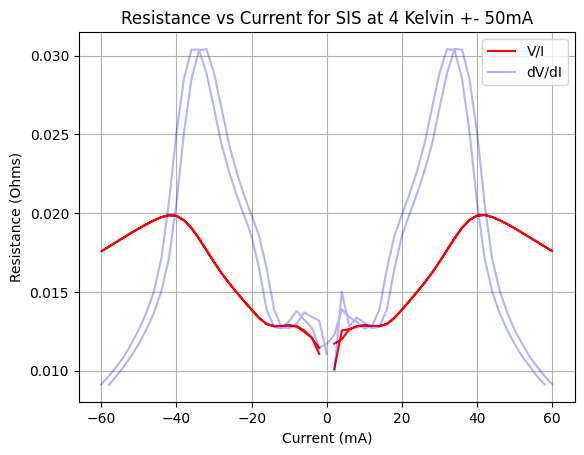

In [138]:
df['V/I (Ohm)'] = df['Voltage (mV)'] / df['Current (mA)']
# replace large values with NaN for better visualization
df.loc[np.abs(df['V/I (Ohm)']) > 1, 'V/I (Ohm)'] = np.nan
plt.plot(df['Current (mA)'], df['V/I (Ohm)'], label='V/I', color='red')

df['dV/dI'] = df['Voltage (mV)'].diff() / df['Current (mA)'].diff()
df.loc[np.abs(df['dV/dI']) > 100, 'dV/dI'] = np.nan
plt.plot(df['Current (mA)'] - df['Current (mA)'].diff(), df['dV/dI'], label='dV/dI', color='blue', alpha=0.3)
peaks = 4
peak_indices = df['dV/dI'].nlargest(peaks).index
#print([(df['Current (mA)'] - df['Current (mA)'].diff())[peak_indices]])



plt.xlabel('Current (mA)')
plt.ylabel('Resistance (Ohms)')
plt.title(f'Resistance vs Current for {test_name}')
plt.legend()
plt.grid()
plt.savefig(f'{test_name}-IR.png')

Peaks at [] K


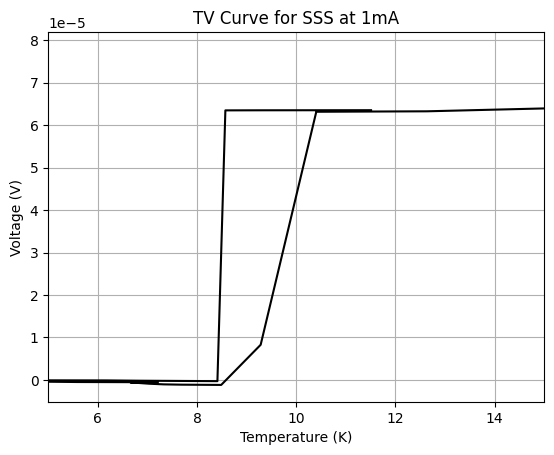

In [131]:
test_name = 'SSS at 1mA'
df = pd.read_csv('20250325 Nb/1ma TV 2.tmp', sep='\t')
plt.plot(df['temperture (K)'], df['voltage (V)'], color='black')

df['dV/dT'] = df['voltage (V)'].diff() / df['temperture (K)'].diff()
df.loc[np.abs(df['dV/dT']) > 100, 'dV/dT'] = np.nan
# only keep peaks in dV/dT
n_peaks = 0
peaks = df['dV/dT'].nlargest(n_peaks).index
temp_peaks = (df['temperture (K)'] - df['temperture (K)'].diff()).iloc[peaks].values
print(f'Peaks at {temp_peaks} K')
[plt.axvline(x=temp, color='red', linestyle='--') for temp in temp_peaks]

plt.xlabel('Temperature (K)')
plt.ylabel('Voltage (V)')
plt.title(f'TV Curve for {test_name}')
plt.xlim(5, 15)
#plt.legend()
plt.grid()
plt.savefig(f'{test_name}-TV.png')
